# Bayes classifier-Unimodal Gaussian density 

## Full covariance matrix for all the classes and is same for all the classes 

1. Same covariance matrix for all the classes may be obtained by taking 
a verage of covariance matrices of all the classes 
2. Same covariance matrix for all the classes by computing the 
covariance matrix of training data of all the classes combined. 

In [1]:
import numpy as np

def load_data(file_path):
    """
    Load the dataset from a space-separated txt file.
    Returns: features (X), labels (y)
    """
    data = np.loadtxt(file_path)
    X = data[:, :-1]  # First two columns as features
    y = data[:, -1]   # Last column as labels
    return X, y

def calculate_class_covariance(X_class):
    """
    Calculate the covariance matrix for a single class.
    """
    return np.cov(X_class, rowvar=False)

def calculate_shared_covariance(X_train, y_train, num_classes):
    """
    Calculate the shared covariance matrix by averaging covariance matrices of each class.
    """
    covariances = []
    
    for i in range(1, num_classes + 1):
        # Select data points of class i
        X_class = X_train[y_train == i]
        # Compute the covariance matrix for this class
        cov_class = calculate_class_covariance(X_class)
        covariances.append(cov_class)
    
    # Compute the average covariance matrix
    return np.mean(covariances, axis=0)

def calculate_combined_covariance(X_train):
    """
    Calculate the covariance matrix for all training data combined.
    """
    return np.cov(X_train, rowvar=False)

def gaussian_pdf(X, mean, cov):
    """
    Compute the Gaussian Probability Density Function for a given data point.
    """
    d = X.shape[1]  # Dimensionality of the data
    cov_inv = np.linalg.inv(cov)  # Inverse of the covariance matrix
    det_cov = np.linalg.det(cov)  # Determinant of the covariance matrix
    
    # Gaussian PDF equation
    return (1 / ((2 * np.pi) ** (d / 2) * np.sqrt(det_cov))) * \
           np.exp(-0.5 * np.sum((X - mean) @ cov_inv * (X - mean), axis=1))

def fit_bayes_classifier(X_train, y_train, num_classes=4):
    """
    Train the Gaussian Bayes classifier with shared covariance matrix.
    """
    # Calculate class-wise means
    means = []
    for i in range(1, num_classes + 1):
        means.append(np.mean(X_train[y_train == i], axis=0))
    
    # Calculate shared covariance matrix using both methods:
    cov_1 = calculate_shared_covariance(X_train, y_train, num_classes)  # Averaging approach
    cov_2 = calculate_combined_covariance(X_train)  # Combined approach
    
    return means, cov_1, cov_2

def predict(X_test, means, cov):
    """
    Predict class labels for the test data using the Gaussian Bayes classifier.
    """
    probs = []
    
    # Calculate Gaussian PDF for each class
    for mean in means:
        prob = gaussian_pdf(X_test, mean, cov)
        probs.append(prob)
    
    # Return the class with the highest probability for each data point
    return np.argmax(np.array(probs), axis=0) + 1  # Adding 1 to match class label (1 to 4)

# Load the datasets
X_train, y_train = load_data(r'C:\Users\raksh\IML-project-dec-2024\classification_datasets\overlapping\combined_dataset_train.txt')
X_test, y_test = load_data(r'C:\Users\raksh\IML-project-dec-2024\classification_datasets\overlapping\combined_dataset_test.txt')
X_val, y_val = load_data(r'C:\Users\raksh\IML-project-dec-2024\classification_datasets\overlapping\combined_dataset_val.txt')

# Fit the classifier using both covariance matrix approaches
means, cov_1, cov_2 = fit_bayes_classifier(X_train, y_train)

# Make predictions on test data
y_pred_1 = predict(X_test, means, cov_1)
y_pred_2 = predict(X_test, means, cov_2)



### Plotting the results

#### Decision region plot for all the classes together with the training data superposed 

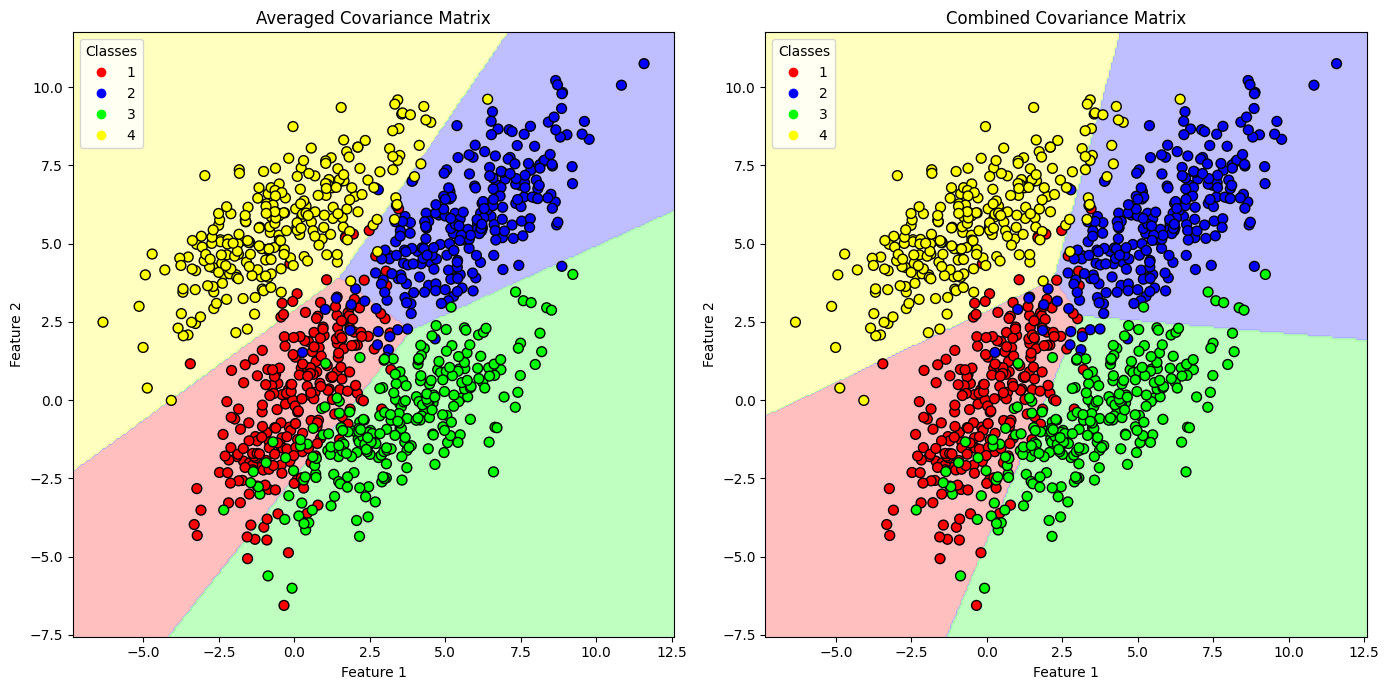

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Function to plot decision region
def plot_decision_regions(X, y, means, cov, ax, title):
    # Create a mesh grid over the feature space
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    
    # Flatten the grid for prediction
    Z = predict(np.c_[xx.ravel(), yy.ravel()], means, cov)
    Z = Z.reshape(xx.shape)

    # Define a colormap for the regions
    cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA', '#FFFFAA'])
    cmap_scatter = ListedColormap(['#FF0000', '#0000FF', '#00FF00', '#FFFF00'])

    # Plot decision regions
    ax.contourf(xx, yy, Z, alpha=0.75, cmap=cmap_background)

    # Plot the training points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_scatter, edgecolor='k', s=50)
    
    # Set plot labels and title
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    
    # Add a legend
    handles, labels = scatter.legend_elements()
    ax.legend(handles, labels, title="Classes")

# Fit the classifier using both covariance matrix approaches
means, cov_1, cov_2 = fit_bayes_classifier(X_train, y_train)

# Create a figure for the plots
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot decision regions for the first approach (averaging covariance matrices)
plot_decision_regions(X_train, y_train, means, cov_1, axes[0], 'Averaged Covariance Matrix')

# Plot decision regions for the second approach (combined covariance matrix)
plot_decision_regions(X_train, y_train, means, cov_2, axes[1], 'Combined Covariance Matrix')

# Show the plots
plt.tight_layout()
plt.show()


#### Decision region plot for all the classes together with the testing data superimposed

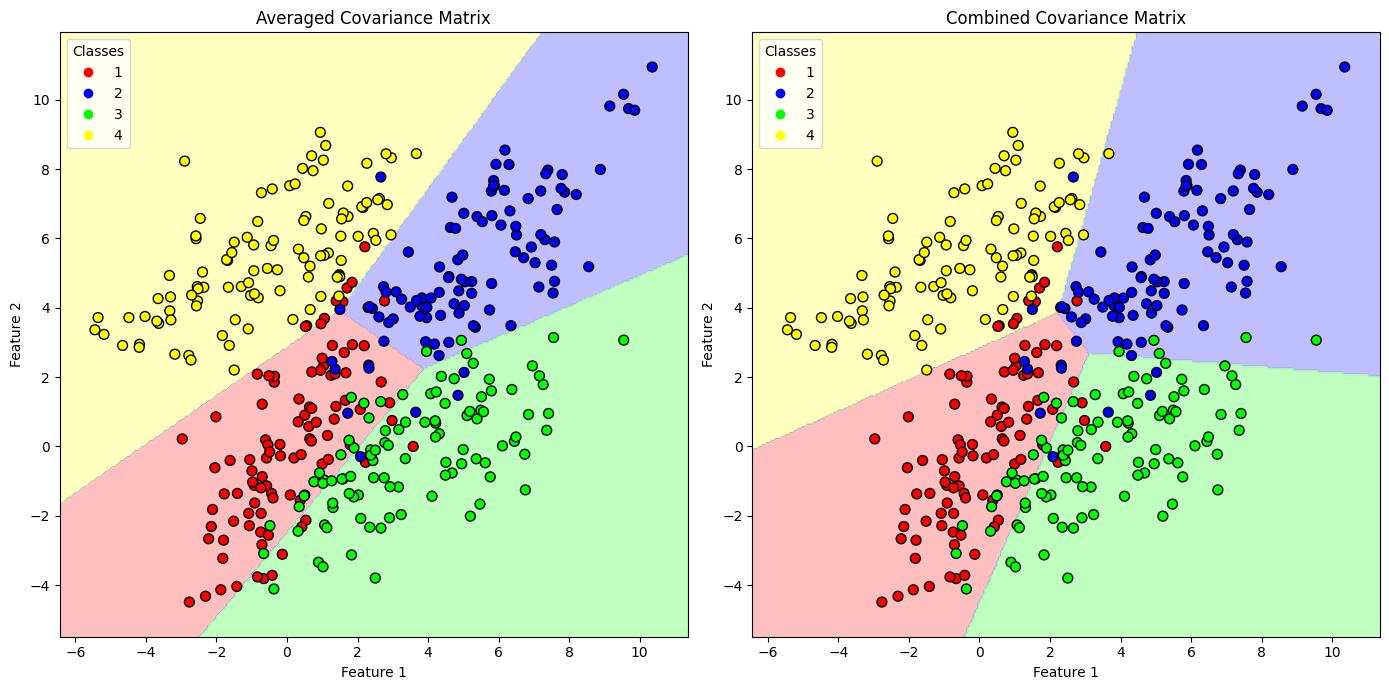

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Function to plot decision region
def plot_decision_regions(X, y, means, cov, ax, title):
    # Create a mesh grid over the feature space
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    
    # Flatten the grid for prediction
    Z = predict(np.c_[xx.ravel(), yy.ravel()], means, cov)
    Z = Z.reshape(xx.shape)

    # Define a colormap for the regions
    cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA', '#FFFFAA'])
    cmap_scatter = ListedColormap(['#FF0000', '#0000FF', '#00FF00', '#FFFF00'])

    # Plot decision regions
    ax.contourf(xx, yy, Z, alpha=0.75, cmap=cmap_background)

    # Plot the training points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_scatter, edgecolor='k', s=50)
    
    # Set plot labels and title
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    
    # Add a legend
    handles, labels = scatter.legend_elements()
    ax.legend(handles, labels, title="Classes")

# Fit the classifier using both covariance matrix approaches
means, cov_1, cov_2 = fit_bayes_classifier(X_train, y_train)

# Create a figure for the plots
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot decision regions for the first approach (averaging covariance matrices)
plot_decision_regions(X_test, y_test, means, cov_1, axes[0], 'Averaged Covariance Matrix')

# Plot decision regions for the second approach (combined covariance matrix)
plot_decision_regions(X_test, y_test, means, cov_2, axes[1], 'Combined Covariance Matrix')

# Show the plots
plt.tight_layout()
plt.show()


#### Decision region plot for every pair of classes with the respective training data superimposed 

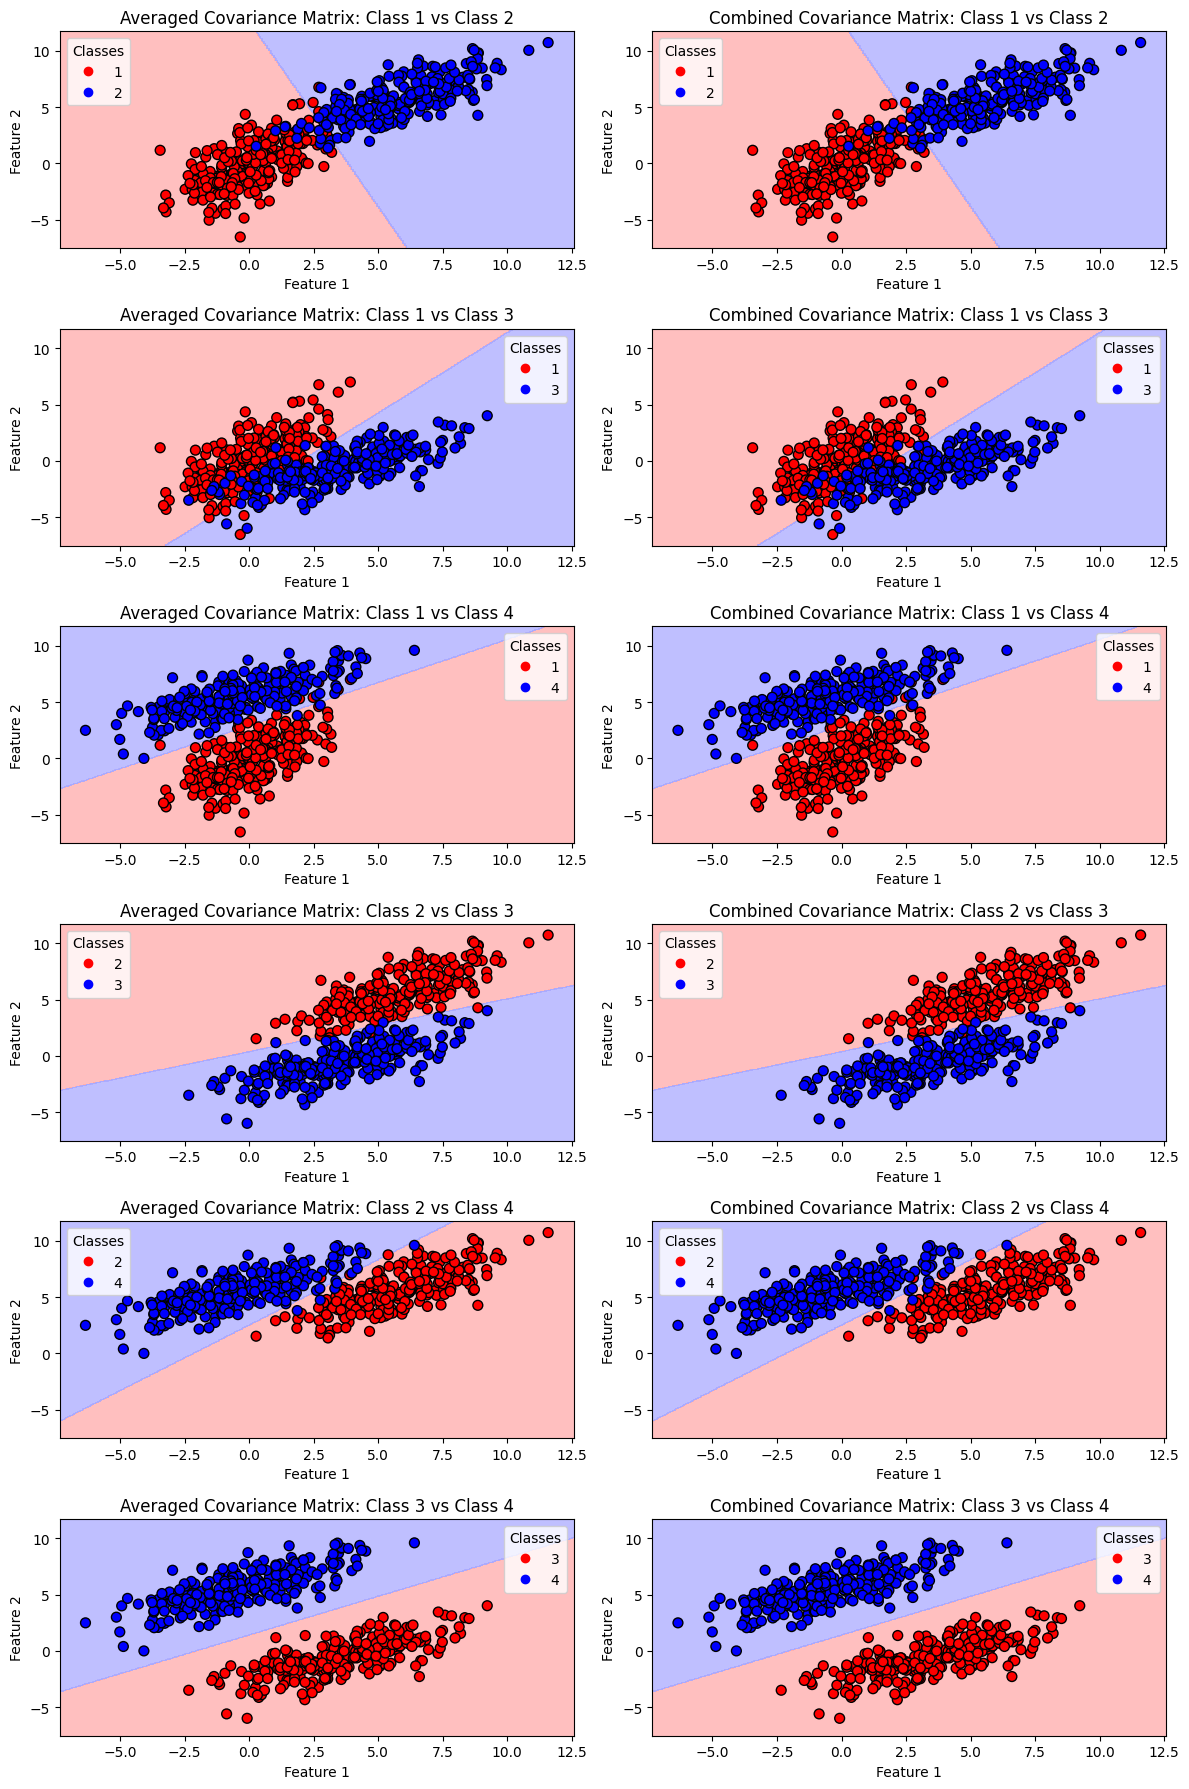

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Function to fit the classifier for each class pair
def fit_pairwise_bayes_classifier(X_train, y_train, class_pair):
    # Filter the data for the current class pair
    mask = np.isin(y_train, class_pair)
    X_train_filtered = X_train[mask]
    y_train_filtered = y_train[mask]
    
    # Calculate means and covariance for the class pair
    means = []
    cov_matrices = []
    
    for class_label in class_pair:
        X_class = X_train_filtered[y_train_filtered == class_label]
        means.append(np.mean(X_class, axis=0))
        cov_matrices.append(np.cov(X_class.T))
    
    # Compute the average covariance matrix (same for all classes)
    combined_cov = np.mean(cov_matrices, axis=0)
    
    return np.array(means), combined_cov

# Function to predict class labels using the Gaussian Bayes classifier
def predict(X, means, cov):
    inv_cov = np.linalg.inv(cov)
    det_cov = np.linalg.det(cov)
    
    # Calculate the discriminant function for each class
    scores = []
    for mean in means:
        diff = X - mean
        score = -0.5 * np.sum(diff @ inv_cov * diff, axis=1) - 0.5 * np.log(det_cov)
        scores.append(score)
    
    # Return the class with the maximum score
    return np.argmax(np.array(scores), axis=0)

# Function to plot decision regions for each class pair
def plot_pairwise_decision_regions(X, y, means, cov, ax, title, class_pair):
    # Create a mesh grid over the feature space
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    
    # Select only the data points of the two classes in the pair
    X_pair = X[np.isin(y, class_pair)]
    y_pair = y[np.isin(y, class_pair)]
    
    # Flatten the grid for prediction
    Z = predict(np.c_[xx.ravel(), yy.ravel()], means, cov)
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundaries
    cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_scatter = ListedColormap(['#FF0000', '#0000FF'])
    ax.contourf(xx, yy, Z, alpha=0.75, cmap=cmap_background)

    # Plot the training points (only for the current class pair)
    scatter = ax.scatter(X_pair[:, 0], X_pair[:, 1], c=y_pair, cmap=cmap_scatter, edgecolor='k', s=50)
    
    # Set plot labels and title
    ax.set_title(f'{title}: Class {class_pair[0]} vs Class {class_pair[1]}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    
    # Add a legend
    handles, labels = scatter.legend_elements()
    ax.legend(handles, labels, title="Classes")

# Define all pairs of classes (1,2), (1,3), (1,4), (2,3), (2,4), (3,4)
class_pairs = [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]

# Create a figure for the plots
fig, axes = plt.subplots(len(class_pairs), 2, figsize=(12, 18))

# Plot decision regions for each class pair
for i, class_pair in enumerate(class_pairs):
    # Fit the classifier for the current pair of classes
    means, cov = fit_pairwise_bayes_classifier(X_train, y_train, class_pair)
    
    # Plot decision regions for the first approach (averaging covariance matrices)
    plot_pairwise_decision_regions(X_train, y_train, means, cov, axes[i, 0], 'Averaged Covariance Matrix', class_pair)
    
    # Plot decision regions for the second approach (combined covariance matrix)
    plot_pairwise_decision_regions(X_train, y_train, means, cov, axes[i, 1], 'Combined Covariance Matrix', class_pair)

# Adjust layout
plt.tight_layout()
plt.show()


## Evaluation metrics
Classification accuracy, precision for every class, mean precision, recall for every 
class, mean recall, F-measure for every class and mean F-measure on test data 

In [5]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd

def calculate_class_covariance(X_class):
    """ Calculate the covariance matrix for a single class. """
    return np.cov(X_class, rowvar=False)

def calculate_shared_covariance(X_train, y_train, num_classes):
    """ Calculate the shared covariance matrix by averaging covariance matrices of each class. """
    covariances = []
    
    for i in range(1, num_classes + 1):
        X_class = X_train[y_train == i]
        cov_class = calculate_class_covariance(X_class)
        covariances.append(cov_class)
    
    return np.mean(covariances, axis=0)

def calculate_combined_covariance(X_train):
    """ Calculate the covariance matrix for all training data combined. """
    return np.cov(X_train, rowvar=False)

def gaussian_pdf(X, mean, cov):
    """ Compute the Gaussian Probability Density Function for a given data point. """
    d = X.shape[1]  # Dimensionality of the data
    cov_inv = np.linalg.inv(cov)  # Inverse of the covariance matrix
    det_cov = np.linalg.det(cov)  # Determinant of the covariance matrix
    
    return (1 / ((2 * np.pi) ** (d / 2) * np.sqrt(det_cov))) * \
           np.exp(-0.5 * np.sum((X - mean) @ cov_inv * (X - mean), axis=1))

def fit_bayes_classifier(X_train, y_train, num_classes=4):
    """ Train the Gaussian Bayes classifier with shared covariance matrix. """
    means = []
    for i in range(1, num_classes + 1):
        means.append(np.mean(X_train[y_train == i], axis=0))
    
    cov_1 = calculate_shared_covariance(X_train, y_train, num_classes)  # Averaging approach
    cov_2 = calculate_combined_covariance(X_train)  # Combined approach
    
    return means, cov_1, cov_2

def predict(X_test, means, cov):
    """ Predict the class label for each test point using Gaussian PDF. """
    num_classes = len(means)
    log_likelihoods = np.zeros((X_test.shape[0], num_classes))
    
    for i in range(num_classes):
        mean = means[i]
        log_likelihoods[:, i] = np.log(gaussian_pdf(X_test, mean, cov))
    
    return np.argmax(log_likelihoods, axis=1) + 1  # Classes are 1, 2, 3, 4

def evaluate_classifier(X_test, y_test, means, cov):
    """ Calculate the evaluation metrics for a classifier. """
    y_pred = predict(X_test, means, cov)
    accuracy = accuracy_score(y_test, y_pred)
    
    precision = precision_score(y_test, y_pred, average=None, labels=np.unique(y_test))
    recall = recall_score(y_test, y_pred, average=None, labels=np.unique(y_test))
    f_measure = f1_score(y_test, y_pred, average=None, labels=np.unique(y_test))
    
    mean_precision = np.mean(precision)
    mean_recall = np.mean(recall)
    mean_f_measure = np.mean(f_measure)
    
    return accuracy, precision, recall, f_measure, mean_precision, mean_recall, mean_f_measure

def evaluate_and_display_results(X_train, y_train, X_test, y_test):
    """ Train classifiers and display evaluation results for both approaches. """
    means_averaged, cov_averaged, _ = fit_bayes_classifier(X_train, y_train, num_classes=4)
    accuracy_averaged, precision_averaged, recall_averaged, f_measure_averaged, mean_precision_averaged, mean_recall_averaged, mean_f_measure_averaged = evaluate_classifier(X_test, y_test, means_averaged, cov_averaged)
    
    means_combined, _, cov_combined = fit_bayes_classifier(X_train, y_train, num_classes=4)
    accuracy_combined, precision_combined, recall_combined, f_measure_combined, mean_precision_combined, mean_recall_combined, mean_f_measure_combined = evaluate_classifier(X_test, y_test, means_combined, cov_combined)
    
    # Prepare data for tabular display
    data_averaged = {
        'Class': ['1', '2', '3', '4', 'Mean'],
        'Precision': list(precision_averaged) + [mean_precision_averaged],
        'Recall': list(recall_averaged) + [mean_recall_averaged],
        'F-measure': list(f_measure_averaged) + [mean_f_measure_averaged]
    }
    
    data_combined = {
        'Class': ['1', '2', '3', '4', 'Mean'],
        'Precision': list(precision_combined) + [mean_precision_combined],
        'Recall': list(recall_combined) + [mean_recall_combined],
        'F-measure': list(f_measure_combined) + [mean_f_measure_combined]
    }
    
    # Create pandas DataFrames for both approaches
    df_averaged = pd.DataFrame(data_averaged)
    df_combined = pd.DataFrame(data_combined)
    
    # Displaying the results in two different tables
    print("Evaluation Results with Averaged Covariance Matrix:")
    print(df_averaged)
    print("\nEvaluation Results with Combined Covariance Matrix:")
    print(df_combined)

# Evaluate and display results
evaluate_and_display_results(X_train, y_train, X_test, y_test)


Evaluation Results with Averaged Covariance Matrix:
  Class  Precision  Recall  F-measure
0     1   0.790000  0.7900   0.790000
1     2   0.957447  0.9000   0.927835
2     3   0.854167  0.8200   0.836735
3     4   0.909091  1.0000   0.952381
4  Mean   0.877676  0.8775   0.876738

Evaluation Results with Combined Covariance Matrix:
  Class  Precision  Recall  F-measure
0     1   0.790476    0.83   0.809756
1     2   0.907216    0.88   0.893401
2     3   0.897727    0.79   0.840426
3     4   0.890909    0.98   0.933333
4  Mean   0.871582    0.87   0.869229


### Covariance matrix

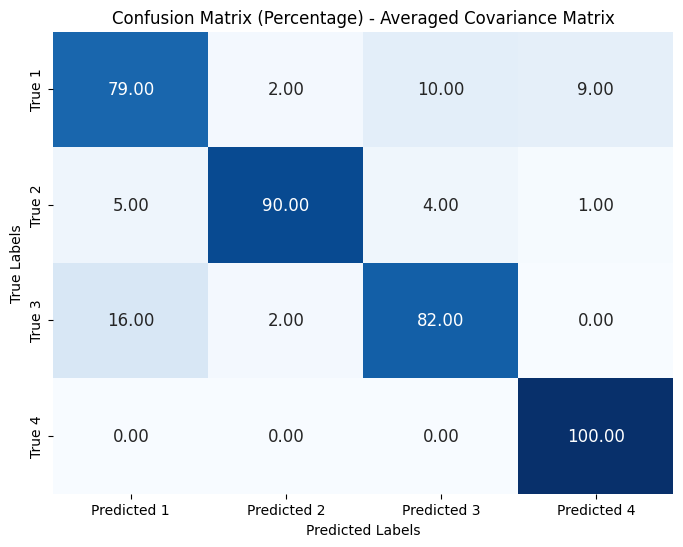

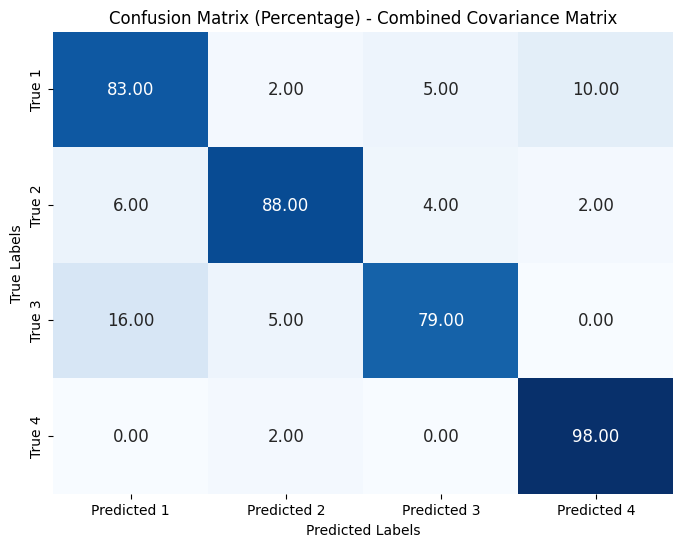

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

def calculate_class_covariance(X_class):
    """ Calculate the covariance matrix for a single class. """
    return np.cov(X_class, rowvar=False)

def calculate_shared_covariance(X_train, y_train, num_classes):
    """ Calculate the shared covariance matrix by averaging covariance matrices of each class. """
    covariances = []
    
    for i in range(1, num_classes + 1):
        X_class = X_train[y_train == i]
        cov_class = calculate_class_covariance(X_class)
        covariances.append(cov_class)
    
    return np.mean(covariances, axis=0)

def calculate_combined_covariance(X_train):
    """ Calculate the covariance matrix for all training data combined. """
    return np.cov(X_train, rowvar=False)

def gaussian_pdf(X, mean, cov):
    """ Compute the Gaussian Probability Density Function for a given data point. """
    d = X.shape[1]  # Dimensionality of the data
    cov_inv = np.linalg.inv(cov)  # Inverse of the covariance matrix
    det_cov = np.linalg.det(cov)  # Determinant of the covariance matrix
    
    return (1 / ((2 * np.pi) ** (d / 2) * np.sqrt(det_cov))) * \
           np.exp(-0.5 * np.sum((X - mean) @ cov_inv * (X - mean), axis=1))

def fit_bayes_classifier(X_train, y_train, num_classes=4):
    """ Train the Gaussian Bayes classifier with shared covariance matrix. """
    means = []
    for i in range(1, num_classes + 1):
        means.append(np.mean(X_train[y_train == i], axis=0))
    
    cov_1 = calculate_shared_covariance(X_train, y_train, num_classes)  # Averaging approach
    cov_2 = calculate_combined_covariance(X_train)  # Combined approach
    
    return means, cov_1, cov_2

def predict(X_test, means, cov):
    """ Predict the class label for each test point using Gaussian PDF. """
    num_classes = len(means)
    log_likelihoods = np.zeros((X_test.shape[0], num_classes))
    
    for i in range(num_classes):
        mean = means[i]
        log_likelihoods[:, i] = np.log(gaussian_pdf(X_test, mean, cov))
    
    return np.argmax(log_likelihoods, axis=1) + 1  # Classes are 1, 2, 3, 4

def calculate_percentage_confusion_matrix(y_test, y_pred):
    """ Calculate confusion matrix in percentage. """
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100  # Normalize to percentage
    return cm_percentage

def plot_confusion_matrix(cm, title='Confusion Matrix'):
    """ Plot confusion matrix as a heatmap. """
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt=".2f", cmap='Blues', xticklabels=[f"Predicted {i}" for i in range(1, 5)], 
                yticklabels=[f"True {i}" for i in range(1, 5)], cbar=False, annot_kws={"size": 12})
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

def evaluate_and_plot_results(X_train, y_train, X_test, y_test):
    """ Train classifiers, compute confusion matrix, and display plots for both approaches. """
    # Averaged approach
    means_averaged, cov_averaged, _ = fit_bayes_classifier(X_train, y_train, num_classes=4)
    y_pred_averaged = predict(X_test, means_averaged, cov_averaged)
    cm_averaged = calculate_percentage_confusion_matrix(y_test, y_pred_averaged)
    
    # Combined approach
    means_combined, _, cov_combined = fit_bayes_classifier(X_train, y_train, num_classes=4)
    y_pred_combined = predict(X_test, means_combined, cov_combined)
    cm_combined = calculate_percentage_confusion_matrix(y_test, y_pred_combined)
    
    # Plot Confusion Matrices
    plot_confusion_matrix(cm_averaged, title='Confusion Matrix (Percentage) - Averaged Covariance Matrix')
    plot_confusion_matrix(cm_combined, title='Confusion Matrix (Percentage) - Combined Covariance Matrix')


# Evaluate and plot results
evaluate_and_plot_results(X_train, y_train, X_test, y_test)
